In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("energy_dataset.csv")

In [3]:
data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [4]:
data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [6]:
data.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [7]:
data.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [8]:
data.isnull().sum()/len(data)

time                                           0.000000
generation biomass                             0.000542
generation fossil brown coal/lignite           0.000513
generation fossil coal-derived gas             0.000513
generation fossil gas                          0.000513
generation fossil hard coal                    0.000513
generation fossil oil                          0.000542
generation fossil oil shale                    0.000513
generation fossil peat                         0.000513
generation geothermal                          0.000513
generation hydro pumped storage aggregated     1.000000
generation hydro pumped storage consumption    0.000542
generation hydro run-of-river and poundage     0.000542
generation hydro water reservoir               0.000513
generation marine                              0.000542
generation nuclear                             0.000485
generation other                               0.000513
generation other renewable                     0

In [9]:
data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


### Plotting Energy Supply Over Time

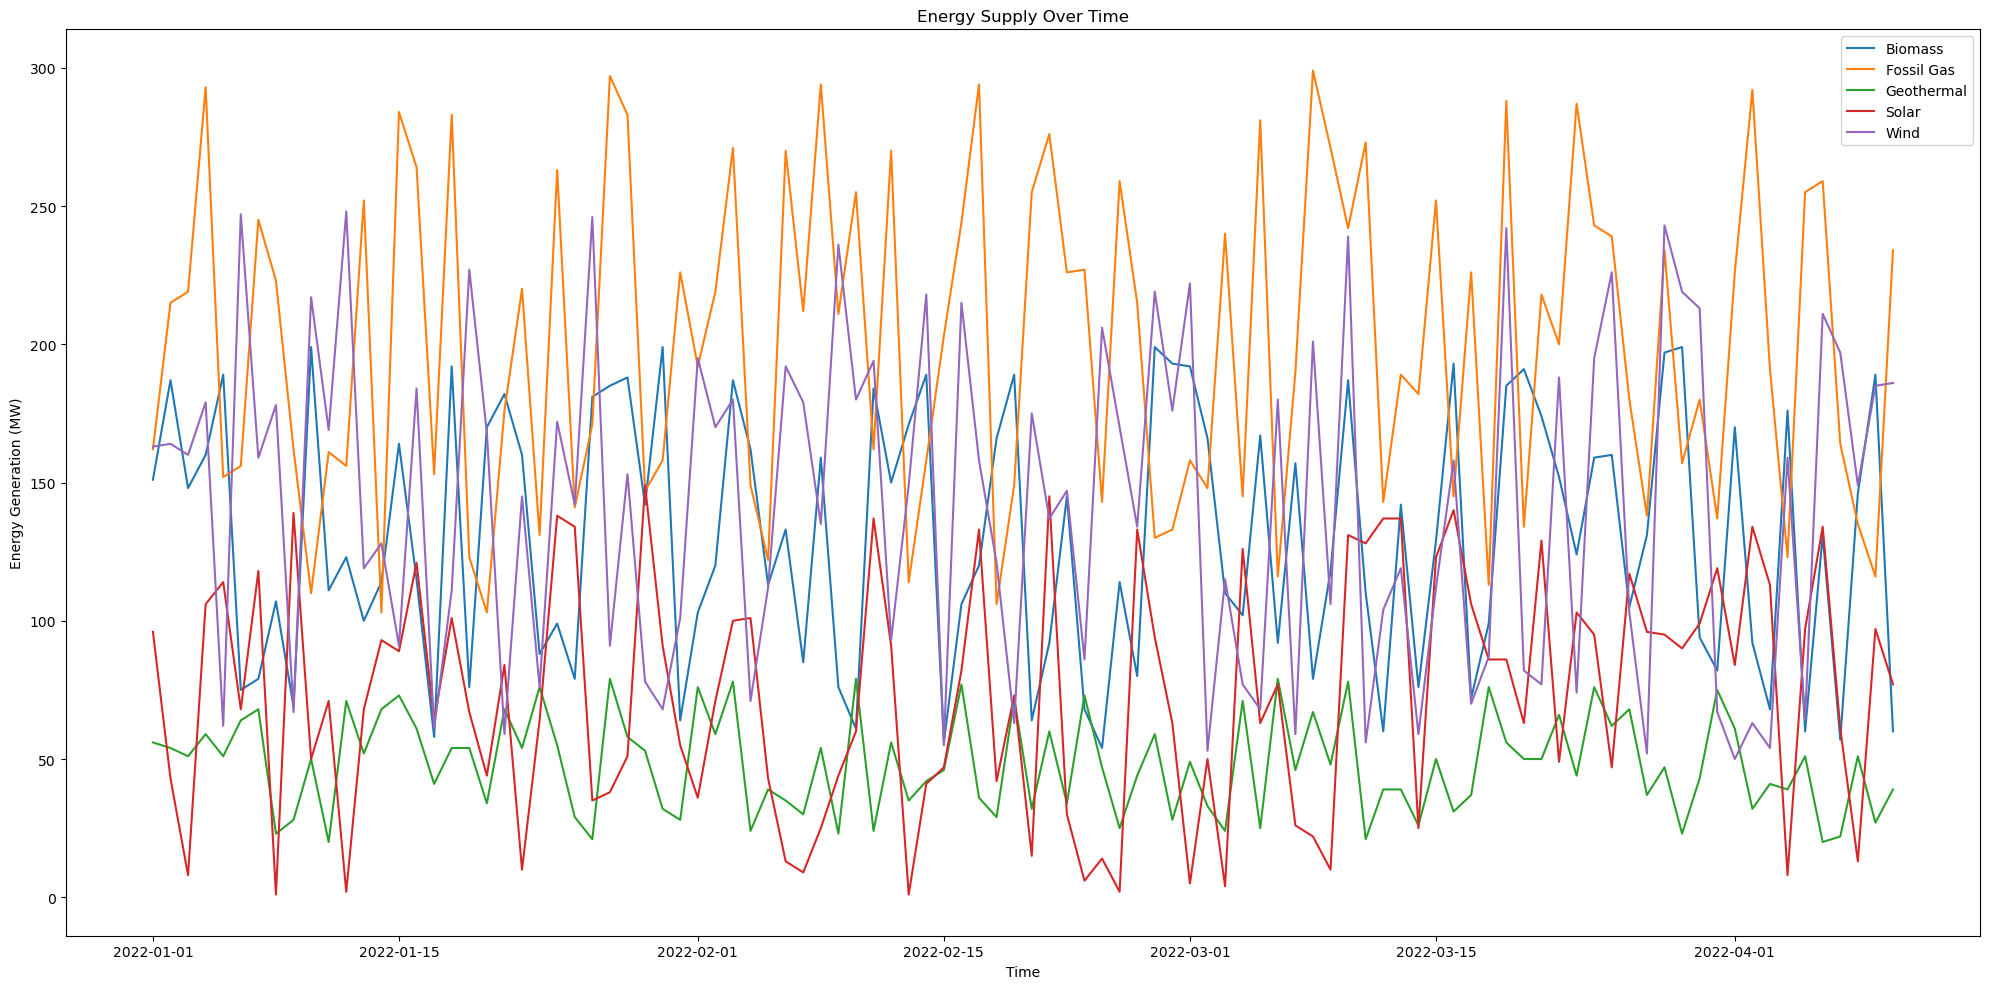

In [57]:
data = {
    'time': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'generation_biomass': np.random.randint(50, 200, size=100),
    'generation_fossil_gas': np.random.randint(100, 300, size=100),
    'generation_geothermal': np.random.randint(20, 80, size=100),
    'generation_solar': np.random.randint(0, 150, size=100),
    'generation_wind': np.random.randint(50, 250, size=100),
}
df = pd.DataFrame(data)
df.set_index('time', inplace=True)

plt.figure(figsize=(20, 10))

plt.plot(df.index, df['generation_biomass'], label='Biomass')
plt.plot(df.index, df['generation_fossil_gas'], label='Fossil Gas')
plt.plot(df.index, df['generation_geothermal'], label='Geothermal')
plt.plot(df.index, df['generation_solar'], label='Solar')
plt.plot(df.index, df['generation_wind'], label='Wind')


plt.xlabel('Time')
plt.ylabel('Energy Generation (MW)')
plt.title('Energy Supply Over Time')
plt.legend()

plt.tight_layout()
plt.show()

### Plotting Solar vs Wind Energy Generation

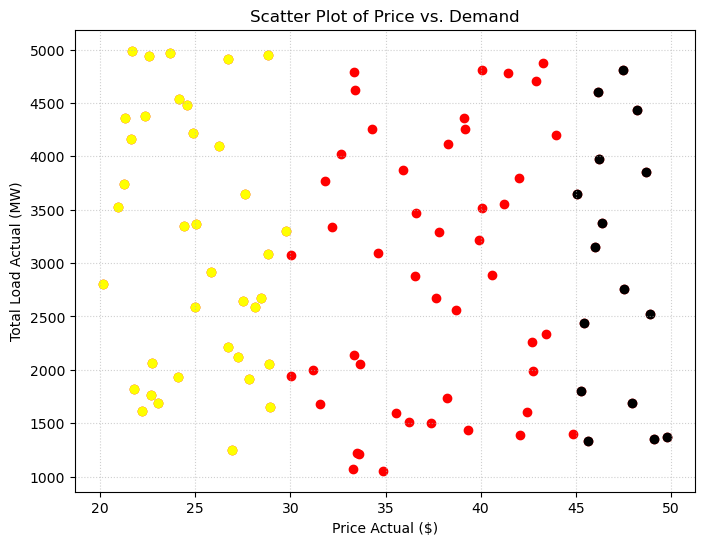

Here Yellow dots indicate the Price Below 30 similarly Red 30 to 45 and Black above 45


In [46]:
data = {
    'time': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'price_actual': np.random.uniform(20, 50, size=100),
    'total_load_actual': np.random.randint(1000, 5000, size=100),
}

df = pd.DataFrame(data)
df.set_index('time', inplace=True)

plt.figure(figsize=(8, 6))

plt.scatter(df['price_actual'], df['total_load_actual'], color='red')
plt.scatter(df['price_actual'][df['price_actual']>45],df['total_load_actual'][df['price_actual']>45],color='black')
plt.scatter(df['price_actual'][df['price_actual']<30],df['total_load_actual'][df['price_actual']<30],color='yellow')


plt.xlabel('Price Actual ($)')
plt.ylabel('Total Load Actual (MW)')
plt.title('Scatter Plot of Price vs. Demand')

plt.grid(ls = ':', alpha = 0.6)
plt.show()

print("Here Yellow dots indicate the Price Below 30 similarly Red 30 to 45 and Black above 45")

### Plotting Comparative Plot of Actual vs. Forecasted Total Load

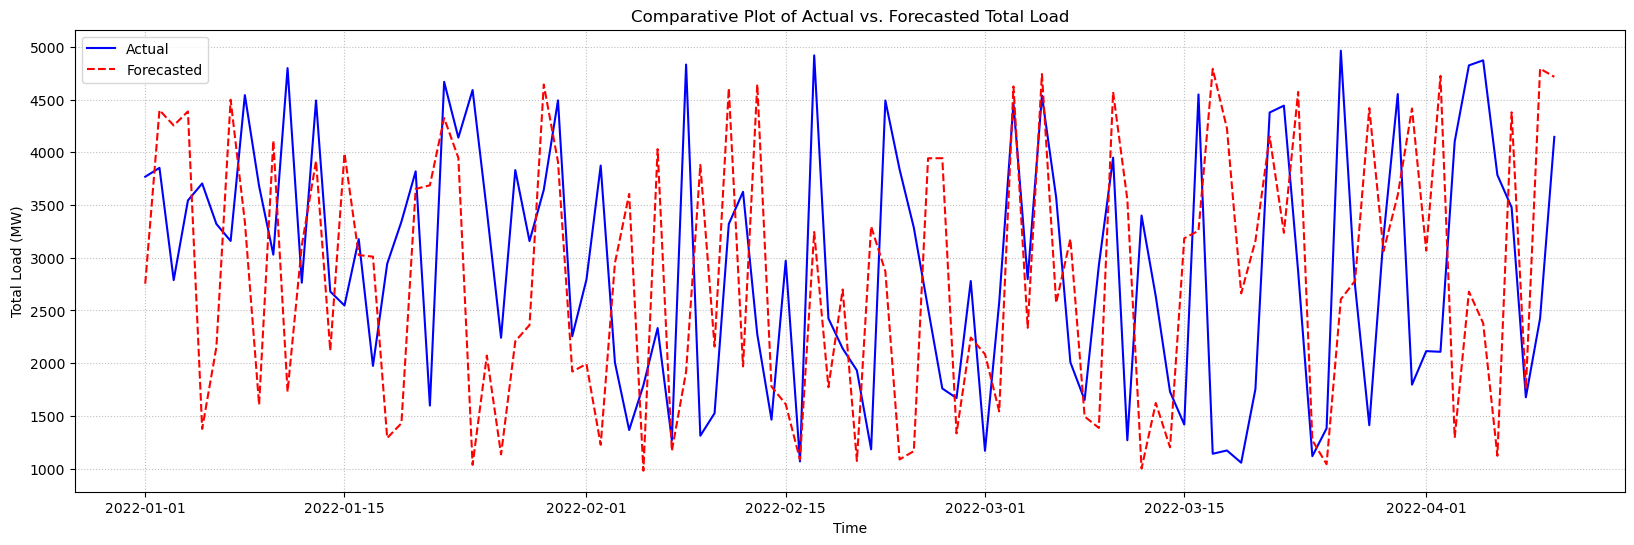

In [59]:
data = {
    'time': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'total_load_actual': np.random.randint(1000, 5000, size=100),
    'total_load_forecast': np.random.randint(900, 4800, size=100),
}

df = pd.DataFrame(data)
df.set_index('time', inplace=True)

plt.figure(figsize=(20, 6))

plt.plot(df.index, df['total_load_actual'], label='Actual', color='blue')

plt.plot(df.index, df['total_load_forecast'], label='Forecasted', linestyle='--', color='red')

plt.xlabel('Time')
plt.ylabel('Total Load (MW)')
plt.title('Comparative Plot of Actual vs. Forecasted Total Load')
plt.legend()

plt.grid(ls = ':', alpha=0.8)
plt.show()


### Plotting Supply and Demand Curves Over Time

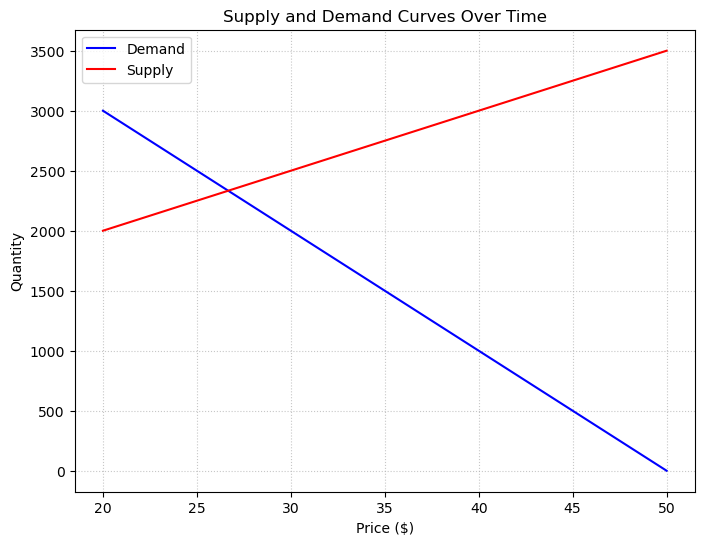

In [55]:
data = {
    'time': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'price_actual': np.random.uniform(20, 50, size=100),
    'total_load_actual': np.random.randint(1000, 5000, size=100),
}

df = pd.DataFrame(data)
df.set_index('time', inplace=True)

def demand_curve(price, intercept=5000, slope=-100):
    return intercept + slope * price

def supply_curve(price, intercept=1000, slope=50):
    return intercept + slope * price

prices = np.linspace(20, 50, 100)

plt.figure(figsize=(8, 6))

plt.plot(prices, demand_curve(prices), label='Demand', color='blue')

plt.plot(prices, supply_curve(prices), label='Supply', color='red')

plt.xlabel('Price ($)')
plt.ylabel('Quantity')
plt.title('Supply and Demand Curves Over Time')
plt.legend()

plt.grid(ls=':',alpha=0.7)

plt.show()


### Plotting Box Plot of Energy Prices by Month

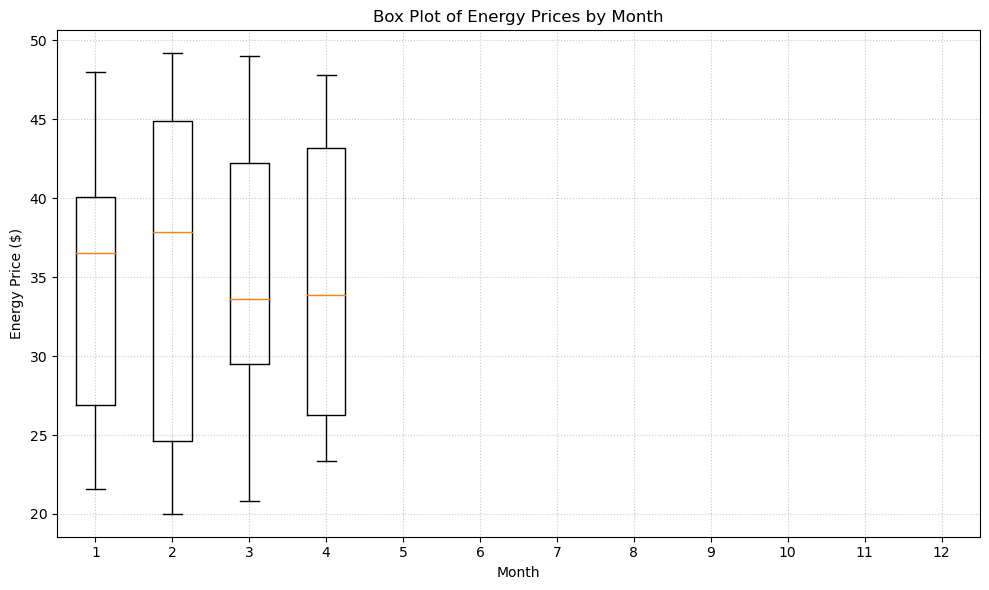

In [63]:
data = {
    'time': pd.date_range(start='2022-01-01', periods=100, freq='D'),
    'price_actual': np.random.uniform(20, 50, size=100),
}

df = pd.DataFrame(data)
df['time_period'] = df['time'].dt.month  # Example: Using month as the time period

plt.figure(figsize=(10, 6))

plt.boxplot([df[df['time_period'] == month]['price_actual'] for month in range(1, 13)], labels=[str(month) for month in range(1, 13)])

plt.xlabel('Month')
plt.ylabel('Energy Price ($)')
plt.title('Box Plot of Energy Prices by Month')

plt.grid(ls=':',alpha=0.7)
plt.tight_layout()
plt.show()


### Plotting Bar Plot for Energy Generation by Source

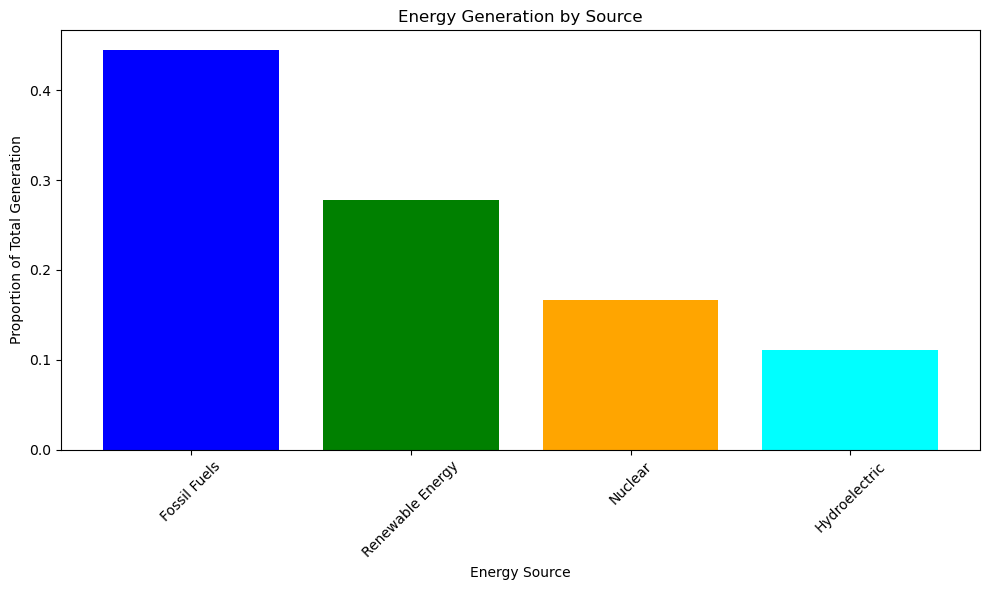

In [65]:
data = {
    'Energy Source': ['Fossil Fuels', 'Renewable Energy', 'Nuclear', 'Hydroelectric'],
    'Generation (TWh)': [400, 250, 150, 100],  # Example generation values (in Terawatt-hours)
}

df = pd.DataFrame(data)

total_generation = df['Generation (TWh)'].sum()

df['Proportion'] = df['Generation (TWh)'] / total_generation

plt.figure(figsize=(10, 6))

plt.bar(df['Energy Source'], df['Proportion'], color=['blue', 'green', 'orange', 'cyan'])

plt.xlabel('Energy Source')
plt.ylabel('Proportion of Total Generation')
plt.title('Energy Generation by Source')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
